#  ----------------Predicting the ticket price of the Aeroplane--------------

In [117]:
import numpy as np
import pandas as pd
data=pd.read_excel('C:/Users/barath raj/Downloads/Data_Train.xlsx')


In [118]:
import seaborn as sb

In [119]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [120]:

!pip install plotly
import plotly.express as px

In [121]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [122]:
data.dropna(inplace=True)

In [123]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [124]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# ---------Converting the features into date-time format---------

In [125]:
def date(a):
    data[a]=pd.to_datetime(data[a])
date('Arrival_Time')
date('Dep_Time')
date('Date_of_Journey')
data['year']=data['Date_of_Journey'].dt.year
data['month']=data['Date_of_Journey'].dt.month
data['day']=data['Date_of_Journey'].dt.day
data.drop('Date_of_Journey',axis=1,inplace=True)

In [126]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-07-24 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-24 05:50:00,2021-07-24 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-24 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-07-24 18:05:00,2021-07-24 23:30:00,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-07-24 16:50:00,2021-07-24 21:35:00,4h 45m,1 stop,No info,13302,2019,1,3


In [127]:
def hour(x):
    data[x+'_hour']=data[x].dt.hour
    data[x+'_minute']=data[x].dt.minute
def drop(x):
    data.drop(x,axis=1,inplace=True)

In [128]:
hour('Dep_Time')
hour('Arrival_Time')

In [129]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-07-24 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-24 05:50:00,2021-07-24 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-24 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-07-24 18:05:00,2021-07-24 23:30:00,5h 25m,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-07-24 16:50:00,2021-07-24 21:35:00,4h 45m,1 stop,No info,13302,2019,1,3,16,50,21,35


In [130]:
drop('Dep_Time')
drop('Arrival_Time')

In [131]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15


#  -----Splitting the Duration column into hour and mins as separate column----

In [132]:
data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [133]:
data['Duration'].unique
dur=list(data['Duration'])

In [134]:
#dur=list(data['Duration'])
for i in range(len(dur)):
    if len(dur[i].split(' '))==2:
        pass
    else:
        if 'm' in dur[i]:
            dur[i]='0h ' + dur[i]
        else:
            dur[i]=dur[i] + ' 0m'


In [135]:
data['Duration']=dur

In [136]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [137]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15


In [138]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [139]:
'20h 60m'.split(' ')

['20h', '60m']

In [140]:
def h(x):
    return x.split(' ')[0][0:-1]
def m(x):
    return x.split(' ')[1][0:-1]    

In [141]:
data['duration_hour']=data['Duration'].apply(h)
data['duration_mins']=data['Duration'].apply(m)

In [142]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25


In [143]:
drop('Duration')

In [144]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,1,3,16,50,21,35,4,45


In [145]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
year                    int64
month                   int64
day                     int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
duration_hour          object
duration_mins          object
dtype: object

In [146]:
data['duration_hour']=data['duration_hour'].astype(int)
data['duration_mins']=data['duration_mins'].astype(int)

In [147]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
year                    int64
month                   int64
day                     int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
duration_hour           int32
duration_mins           int32
dtype: object

# -------------------- Creating various INSIGHTS from the data ----------------

In [148]:
b=data['Source'].value_counts().reset_index()

In [149]:
b.columns=['state','count']
b

,state,count
0,Delhi,4536
1,Kolkata,2871
2,Banglore,2197
3,Mumbai,697
4,Chennai,381


In [150]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25


#                    Number of Airline passengers  in a State

In [151]:
px.bar(b,x=b['state'],y=b['count'],color=b['state'],hover_name=b['state'])

In [152]:
d=data['Total_Stops'].value_counts().reset_index()
d.columns=['stop','count']
d

,stop,count
0,1 stop,5625
1,non-stop,3491
2,2 stops,1520
3,3 stops,45
4,4 stops,1


# Count of Flights with number of stoppings

In [153]:
px.bar(d,y='count',x=['1 stop','non-stop','2 stops','3 stops','4 stops'],hover_name='stop',color='stop')

In [154]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

In [155]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,1,3,16,50,21,35,4,45


In [156]:
data['month'].unique()

array([ 3,  1,  9, 12,  6,  5,  4], dtype=int64)

In [157]:
x=['month','Price']
data1=data[x]
data1

,month,Price
0,3,3897
1,1,7662
2,9,13882
3,12,6218
4,1,13302
...,...,...
10678,9,4107
10679,4,4145
10680,4,7229
10681,1,12648


In [158]:
aa={
    1:'jan',
    2:'feb',
    3:'mar',
    4:'apr',
    5:'may',
    6:'jun',
    7:'jul',
    8:'aug',
    9:'sep',
    10:'oct',
    11:'nov',
    12:'dec'
    
}
data['month']=data.month.map(aa)

In [159]:
final=data.groupby(['month'])['Price'].mean().reset_index()
final

,month,Price
0,apr,5230.860849
1,dec,9110.774295
2,jan,10492.642791
3,jun,9215.649310
4,mar,8433.839891
5,may,9361.077628
6,sep,9551.474395


In [160]:
import sort_dataframeby_monthorweek as sdd
def sort(df,col):
    return sdd.Sort_Dataframeby_Month(df,col)
data1=sort(final,'month')

In [161]:
data1

,month,Price
0,jan,10492.642791
1,mar,8433.839891
2,apr,5230.860849
3,may,9361.077628
4,jun,9215.649310
5,sep,9551.474395
6,dec,9110.774295


# Average amount spend by  Airline passengers in a month

In [162]:
px.bar(x=data1['month'],y=data1['Price'],color=data1['month'],hover_name=data1['month'])

In [163]:
c=data['month'].value_counts().reset_index()
c.columns=['month','travellers']
c

,month,travellers
0,jun,2535
1,mar,2211
2,may,2074
3,sep,1406
4,jan,1075
5,dec,957
6,apr,424


# Total number of passengers in a month

In [164]:
px.bar(x=c['month'],y=c['travellers'],color=c['month'],hover_name=c['month'])

In [165]:
data2=data.groupby(['Airline'])['Price'].mean().reset_index()
data2

,Airline,Price
0,Air Asia,5590.260188
1,Air India,9612.427756
2,GoAir,5861.056701
3,IndiGo,5673.682903
4,Jet Airways,11643.923357
5,Jet Airways Business,58358.666667
6,Multiple carriers,10902.678094
7,Multiple carriers Premium economy,11418.846154
8,SpiceJet,4338.284841
9,Trujet,4140.000000


# Amount earned by different Airlines

In [166]:
px.bar(y=data2['Price'],x=data2['Airline'],hover_name=data2['Airline'],color=data2['Airline'])

In [167]:
s=data['Airline'].value_counts().reset_index()
s.columns=['airline','count']
s

,airline,count
0,Jet Airways,3849
1,IndiGo,2053
2,Air India,1751
3,Multiple carriers,1196
4,SpiceJet,818
5,Vistara,479
6,Air Asia,319
7,GoAir,194
8,Multiple carriers Premium economy,13
9,Jet Airways Business,6


# Number of passengers in different Airlines

In [168]:
px.funnel(x=s['airline'],y=s['count'],color=s['airline'],hover_name=s['airline'])

In [169]:
bb={
    'jan':1,
    'feb':2,
    'mar':3,
    'apr':4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12
    
}
data['month']=data['month'].map(bb)

#  ------------------------------ LabelEncoding -------------------------------

In [170]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
one=LabelEncoder()
def LabelEncoder(x):
    data[x]=one.fit_transform(data[x])

In [171]:
LabelEncoder('Airline')
LabelEncoder('Source')
LabelEncoder('Destination')
LabelEncoder('Total_Stops')
LabelEncoder('Additional_Info')


In [172]:
data['Airline'].unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9])

In [173]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_mins
0,3,0,5,BLR → DEL,4,8,3897,2019,3,24,22,20,1,10,2,50
1,1,3,0,CCU → IXR → BBI → BLR,1,8,7662,2019,1,5,5,50,13,15,7,25
2,4,2,1,DEL → LKO → BOM → COK,1,8,13882,2019,9,6,9,25,4,25,19,0
3,3,3,0,CCU → NAG → BLR,0,8,6218,2019,12,5,18,5,23,30,5,25
4,3,0,5,BLR → NAG → DEL,0,8,13302,2019,1,3,16,50,21,35,4,45


# ---------- splitting Route column as separate column on stopping basis -----------

In [174]:
data['route_1']=data['Route'].str.split('→').str[0]
data['route_2']=data['Route'].str.split('→').str[1]
data['route_3']=data['Route'].str.split('→').str[2]
data['route_4']=data['Route'].str.split('→').str[3]
data['route_5']=data['Route'].str.split('→').str[4]

In [175]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_mins,route_1,route_2,route_3,route_4,route_5
0,3,0,5,BLR → DEL,4,8,3897,2019,3,24,22,20,1,10,2,50,BLR,DEL,NaN,NaN,NaN
1,1,3,0,CCU → IXR → BBI → BLR,1,8,7662,2019,1,5,5,50,13,15,7,25,CCU,IXR,BBI,BLR,NaN
2,4,2,1,DEL → LKO → BOM → COK,1,8,13882,2019,9,6,9,25,4,25,19,0,DEL,LKO,BOM,COK,NaN
3,3,3,0,CCU → NAG → BLR,0,8,6218,2019,12,5,18,5,23,30,5,25,CCU,NAG,BLR,NaN,NaN
4,3,0,5,BLR → NAG → DEL,0,8,13302,2019,1,3,16,50,21,35,4,45,BLR,NAG,DEL,NaN,NaN


In [176]:
data.isna().sum()

Airline                    0
Source                     0
Destination                0
Route                      0
Total_Stops                0
Additional_Info            0
Price                      0
year                       0
month                      0
day                        0
Dep_Time_hour              0
Dep_Time_minute            0
Arrival_Time_hour          0
Arrival_Time_minute        0
duration_hour              0
duration_mins              0
route_1                    0
route_2                    0
route_3                 3491
route_4                 9116
route_5                10636
dtype: int64

In [177]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'year', 'month', 'day', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'duration_hour', 'duration_mins', 'route_1', 'route_2', 'route_3',
       'route_4', 'route_5'],
      dtype='object')

In [178]:
for i in ['route_3','route_4','route_5']:
    data[i].fillna('None',inplace=True)

In [179]:
data.isna().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Total_Stops            0
Additional_Info        0
Price                  0
year                   0
month                  0
day                    0
Dep_Time_hour          0
Dep_Time_minute        0
Arrival_Time_hour      0
Arrival_Time_minute    0
duration_hour          0
duration_mins          0
route_1                0
route_2                0
route_3                0
route_4                0
route_5                0
dtype: int64

In [180]:
pd.set_option('display.max_columns',21)

In [181]:
LabelEncoder('route_1')
LabelEncoder('route_2')
LabelEncoder('route_3')
LabelEncoder('route_4')
LabelEncoder('route_5')
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_mins,route_1,route_2,route_3,route_4,route_5
0,3,0,5,BLR → DEL,4,8,3897,2019,3,24,22,20,1,10,2,50,0,13,29,13,5
1,1,3,0,CCU → IXR → BBI → BLR,1,8,7662,2019,1,5,5,50,13,15,7,25,2,25,1,3,5
2,4,2,1,DEL → LKO → BOM → COK,1,8,13882,2019,9,6,9,25,4,25,19,0,3,32,4,5,5
3,3,3,0,CCU → NAG → BLR,0,8,6218,2019,12,5,18,5,23,30,5,25,2,34,3,13,5
4,3,0,5,BLR → NAG → DEL,0,8,13302,2019,1,3,16,50,21,35,4,45,0,34,8,13,5


In [183]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [184]:
data.drop('year',axis=1,inplace=True)


In [185]:
data.drop('Route',axis=1,inplace=True)

In [186]:
import matplotlib.pyplot as plt
def plot(x):
    plt.subplot()
    sb.boxplot(data[x])

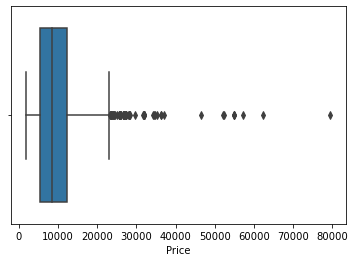

In [187]:
plot('Price')

In [188]:
data['Price']=np.where(data['Price']>=40000,data['Price'].median(),data['Price'])

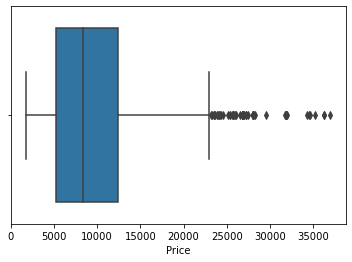

In [189]:
plot('Price')

In [190]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_mins,route_1,route_2,route_3,route_4,route_5
0,3,0,5,4,8,3897.0,3,24,22,20,1,10,2,50,0,13,29,13,5
1,1,3,0,1,8,7662.0,1,5,5,50,13,15,7,25,2,25,1,3,5
2,4,2,1,1,8,13882.0,9,6,9,25,4,25,19,0,3,32,4,5,5
3,3,3,0,0,8,6218.0,12,5,18,5,23,30,5,25,2,34,3,13,5
4,3,0,5,0,8,13302.0,1,3,16,50,21,35,4,45,0,34,8,13,5


#  ---------------------------- Selecting important features------------------------

In [191]:
from sklearn.feature_selection import mutual_info_classif
y=data['Price']
x=data.drop('Price',axis=1)


In [192]:
mutual_info_classif(x,y)

array([2.57735023, 2.3791265 , 2.43614062, 1.58077664, 2.12286819,
       0.83720403, 1.06798462, 1.45790938, 1.18839713, 1.82211018,
       1.51776024, 1.8021184 , 1.06035503, 2.09185323, 2.72530092,
       2.27850707, 1.51564566, 0.75856595])

In [193]:
imp=pd.DataFrame(mutual_info_classif(x,y),index=x.columns)
imp.columns=['importance']


In [194]:
imp

,importance
Airline,2.574427
Source,2.383494
Destination,2.431554
Total_Stops,1.519629
Additional_Info,2.149509
month,0.878220
day,1.090565
Dep_Time_hour,1.426194
Dep_Time_minute,1.213686
Arrival_Time_hour,1.837236


In [195]:
imp.sort_values(by='importance',ascending=False)


,importance
route_2,2.769992
Airline,2.574427
Destination,2.431554
Source,2.383494
route_3,2.311849
Additional_Info,2.149509
route_1,2.010150
Arrival_Time_hour,1.837236
duration_hour,1.779696
Arrival_Time_minute,1.532160


# ------------------------------Creating model----------------------------

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,r2_score,mean_squared_error
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [197]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [198]:
[int(x) for x in np.linspace(start=5,stop=30,num=6)]

[5, 10, 15, 20, 25, 30]

In [200]:
from sklearn.ensemble import RandomForestRegressor
import pickle
def predict(model,dump):
    le=model
    le.fit(xtrain,ytrain)
    print('training score {}'.format(le.score(xtrain,ytrain)))
    
    pre=le.predict(xtest)
    print('test score {}'.format(le.score(xtest,ytest)))
    print('\n')
    
    print('cross validate score {}'.format(cross_val_score(le,x,y,cv=5)))
    print('r2_score',r2_score(pre,ytest))
    print('mse',mean_squared_error(pre,ytest))
    print('\n')

    sb.distplot(pre-ytest)
    if dump==1:
        file=open('C:/Users/barath raj/Documents/model.pkl','wb')
        pickle.dump(model,file)

training score 0.9835267766934306
test score 0.9237482860174898


cross validate score [0.91553865 0.91931407 0.90644636 0.90387397 0.90352174]
r2_score 0.9194883926329959
mse 1427545.403555712




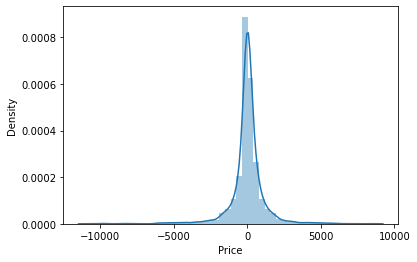

In [201]:
predict(RandomForestRegressor(),1)

training score 0.996711528137427
test score 0.8572038381873748


cross validate score [0.85017551 0.87488193 0.83340038 0.84733215 0.84940238]
r2_score 0.8640276982290765
mse 2673356.3587536835




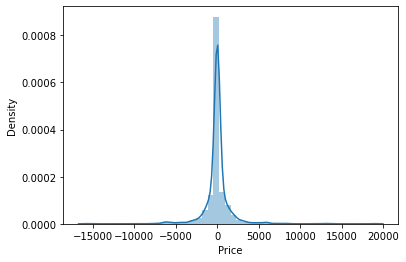

In [202]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor(),0)

# ------------ This is how the coustomer use the model to predict data -----------

In [203]:
model=open('C:/Users/barath raj/Documents/model.pkl','rb')
forest=pickle.load(model)

In [204]:
pre2=forest.predict(xtest)

In [205]:
r2_score(pre2,ytest)

0.9194883926329959

In [207]:
cross_val_score(forest,x,y,cv=5)

array([0.91538938, 0.92195185, 0.90945392, 0.90468298, 0.90130705])

In [208]:
cross_val_score(forest,x,y,cv=5).mean()

0.9107158636883543